Son ağırlıklar:
Bias (theta_0): 194.5865270782886
X1 için ağırlık (theta_1): 68.7641449987596
X2 için ağırlık (theta_2): 42.8757979242129


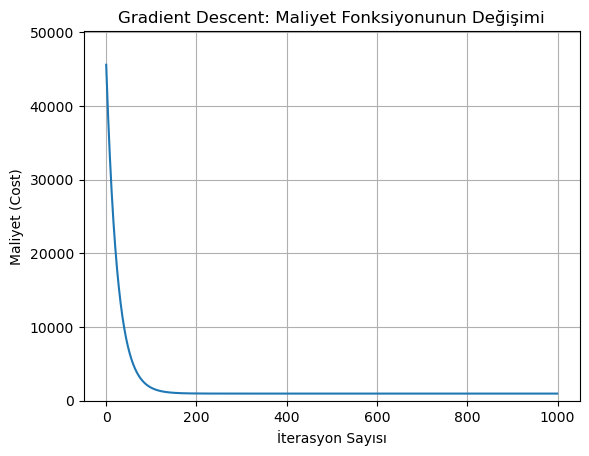

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükleme
data = pd.read_csv(r"C:/Users/gizem/Downloads/Multivariate_Linear_Regression (1).csv")

# Giriş değişkenleri ve hedef değişkeni ayırma
X1 = data['X1'].to_numpy().reshape(-1, 1)
X2 = data['X2'].to_numpy().reshape(-1, 1)
y_target = data['y'].to_numpy().reshape(-1, 1)

# Normalizasyon işlemi
X1_normalized = (X1 - np.mean(X1)) / np.std(X1)
X2_normalized = (X2 - np.mean(X2)) / np.std(X2)

# Bias terimi ile birlikte girişlerin birleştirilmesi
X_combined = np.concatenate([np.ones((len(X1_normalized), 1)), X1_normalized, X2_normalized], axis=1)

# Ağırlıkların rastgele başlatılması
weights = np.random.randn(3, 1)

# Hiperparametreler
alpha = 0.01  # Öğrenme oranı
num_iterations = 1000
sample_size = len(y_target)

# Gradient Descent fonksiyonu
def gradient_descent_function(X, y, weights, alpha, num_iterations):
    cost_values = []

    for _ in range(num_iterations):
        predictions = X @ weights  # Tahmin
        error = predictions - y      # Hata hesaplama
        gradients = (2 / sample_size) * X.T @ error  # Gradyan hesaplama
        weights -= alpha * gradients  # Ağırlık güncelleme

        mse = (1 / sample_size) * np.sum(error ** 2)  # Ortalama kare hatası
        cost_values.append(mse)  # Maliyetleri kaydetme

    return weights, cost_values

# Gradient Descent'i çalıştırma
final_weights, cost_values = gradient_descent_function(X_combined, y_target, weights, alpha, num_iterations)

# Sonuçları yazdırma
print(f"Son ağırlıklar:\nBias (theta_0): {final_weights[0][0]}")
print(f"X1 için ağırlık (theta_1): {final_weights[1][0]}")
print(f"X2 için ağırlık (theta_2): {final_weights[2][0]}")

# Maliyet fonksiyonu grafiği
plt.plot(range(num_iterations), cost_values)
plt.xlabel("İterasyon Sayısı")
plt.ylabel("Maliyet (Cost)")
plt.title("Gradient Descent: Maliyet Fonksiyonunun Değişimi")
plt.ylim(0, np.max(cost_values) * 1.1)  # Eksen sınırını ayarlama
plt.grid()  # Izgara ekleme
plt.show()
